In [77]:
%matplotlib inline
import pandas as pd

In [78]:
df = pd.read_json('hmd_clusters.json')
df.head()

,item_code,issue_code,publication_code,prevSentence,currentSentence,markedSentence,maskedSentence,nextSentence,targetExpression,article_path,...,energy_1890_1900,upperclass_1890_1900,child_1890_1900,workanimal_1890_1900,spiritual_1890_1900,body_1890_1900,system_1890_1900,nature_1890_1900,slave_1890_1900,female_1890_1900
0,art0023,18550811,2244,Warranted to last Fifty Years and to repay its...,Thd action of this machine is powerful and sim...,Thd action of this $***machine***$ is powerful...,Thd action of this [MASK] is powerful and simp...,"By turning the/wheel from left to right , the ...",machine,0002244/1855/0811/0002244_18550811_art0023.txt,...,0.397,0.172,0.192,0.270,0.311,0.384,0.351,0.317,0.168,0.185
1,art0006,18550915,2244,Men can continue to work and breath in an expl...,This machine consists of a small wheel of stee...,This $***machine***$ consists of a small wheel...,This [MASK] consists of a small wheel of steel...,Although in the day the light appears very fee...,machine,0002244/1855/0915/0002244_18550915_art0006.txt,...,0.346,0.146,0.199,0.283,0.279,0.305,0.246,0.298,0.172,0.188
2,art0012,18090623,2647,From these Gelds of ac .,"Inc industry, tbc Company resorted to the grea...","Inc industry , tbc Company resorted to the gre...","Inc industry , tbc Company resorted to the gre...",The Soeop.shearing was extended this day to th...,machine,0002647/1809/0623/0002647_18090623_art0012.txt,...,0.447,0.160,0.237,0.392,0.352,0.493,0.405,0.400,0.198,0.224
3,art0012,18090623,2647,JUNI * I,.. • Tint proceedings of this day commenced wi...,. . • Tint proceedings of this day commenced w...,. . • Tint proceedings of this day commenced w...,To this succeeded a review of various drills a...,machine,0002647/1809/0623/0002647_18090623_art0012.txt,...,0.013,0.011,0.010,0.010,0.013,0.012,0.008,0.014,0.006,0.008
4,art0012,18090623,2647,From these Gelds of ac .,"Inc industry, tbc Company resorted to the grea...","Inc industry , tbc Company resorted to the gre...","Inc industry , tbc Company resorted to the gre...",The Soeop.shearing was extended this day to th...,machines,0002647/1809/0623/0002647_18090623_art0012.txt,...,0.253,0.129,0.161,0.241,0.237,0.287,0.219,0.236,0.132,0.162


In [79]:
df.columns

Index(['item_code', 'issue_code', 'publication_code', 'prevSentence',
       'currentSentence', 'markedSentence', 'maskedSentence', 'nextSentence',
       'targetExpression', 'article_path', 'item_id', 'issue_id',
       'publication_id', 'issue_date', 'item_type', 'word_count',
       'ocr_quality_mean', 'title', 'location', 'year', 'synt', 'query_label',
       'pred_bert_1760_1850', 'pred_bert_1890_1900', 'stopwords_1760_1850',
       'punctuation_1760_1850', 'machines_1760_1850', 'transport_1760_1850',
       'workforce_1760_1850', 'energy_1760_1850', 'upperclass_1760_1850',
       'child_1760_1850', 'workanimal_1760_1850', 'spiritual_1760_1850',
       'body_1760_1850', 'system_1760_1850', 'nature_1760_1850',
       'slave_1760_1850', 'female_1760_1850', 'stopwords_1890_1900',
       'punctuation_1890_1900', 'machines_1890_1900', 'transport_1890_1900',
       'workforce_1890_1900', 'energy_1890_1900', 'upperclass_1890_1900',
       'child_1890_1900', 'workanimal_1890_1900', 'spiri

In [102]:
from collections import Counter
predictions = [t[0] for r in df.pred_bert_1760_1850 for t in r]
predictions_count = Counter(predictions)
df_wc = pd.DataFrame.from_dict(dict(predictions_count),orient='index')
df_wc.columns = ['freq']
df_wc.head()
df_wc.to_csv('hmd_pred_counts_1760_1850.csv')

In [112]:
df_wc.sort_values('freq',inplace=True,ascending=False)
top= [w for w in list(df_wc[:200].index) if len(w) > 2 and w.isalpha()][:100]
print(top)

['machine', 'machinery', 'apparatus', 'engine', 'machines', 'work', 'system', 'wheel', 'instrument', 'engines', 'power', 'mill', 'process', 'instruments', 'works', 'house', 'mills', 'frame', 'one', 'tools', 'vessel', 'man', 'plan', 'implements', 'hand', 'men', 'implement', 'articles', 'water', 'method', 'wheels', 'body', 'paper', 'boat', 'establishment', 'vessels', 'whole', 'scale', 'cylinder', 'carriage', 'principle', 'business', 'operation', 'vehicle', 'box', 'press', 'invention', 'means', 'rope', 'article', 'hands', 'place', 'and', 'piece', 'iron', 'furnace', 'houses', 'horses', 'pump', 'mode', 'stone', 'operations', 'fire', 'establishments', 'people', 'art', 'cart', 'thing', 'materials', 'carriages', 'material', 'latter', 'office', 'horse', 'room', 'the', 'same', 'table', 'patent', 'inventions', 'party', 'goods', 'ground', 'other', 'clock', 'pumps', 'ship', 'things', 'knife', 'line', 'coach', 'boats', 'factories', 'company', 'tube', 'person', 'models', 'case', 'experiment', 'watch'

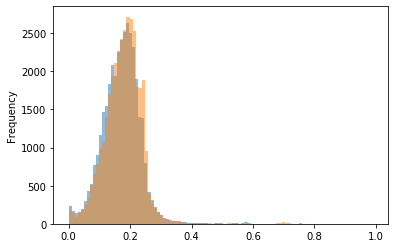

In [108]:
df.child_1760_1850.plot(kind='hist',bins=100,alpha=.5)
df.child_1890_1900.plot(kind='hist',bins=100,alpha=.5)

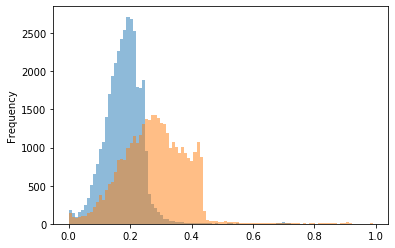

In [50]:
df.child_1890_1900.plot(kind='hist',bins=100,alpha=.5)
df.workforce_1890_1900.plot(kind='hist',bins=100,alpha=.5)

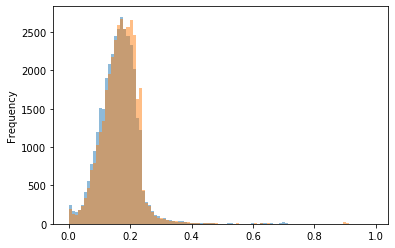

In [12]:
df.female_1760_1850.plot(kind='hist',bins=100,alpha=.5)
df.female_1890_1900.plot(kind='hist',bins=100,alpha=.5)
workforce_1760_1850

In [17]:
datetime(*map(int,'1855-08-11'.split('-')))

datetime.datetime(1855, 8, 11, 0, 0)

In [29]:
from datetime import datetime
to_timestap = lambda x: datetime(*map(int,x.split("-")))
df['timestamp'] = df.issue_date.apply(to_timestap)
df['year'] = df.timestamp.apply(lambda x: x.year)

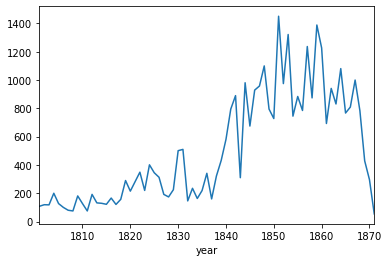

In [35]:
yearly_counts = df.groupby('year')['item_code'].count()
yearly_counts.plot()

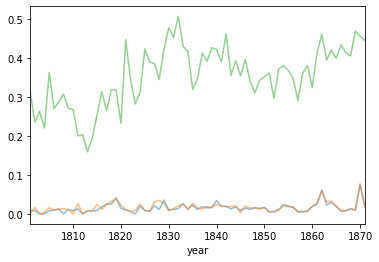

In [49]:
(df[df.female_1760_1850 > .3].groupby('year')['item_code'].count() / yearly_counts).fillna(0,inplace=False).plot(alpha=.5)
(df[df.child_1760_1850 > .3].groupby('year')['item_code'].count() / yearly_counts).fillna(0,inplace=False).plot(alpha=.5)
(df[df.workforce_1760_1850 > .3].groupby('year')['item_code'].count() / yearly_counts).fillna(0,inplace=False).plot(alpha=.5)


In [47]:
df['female_1760_1850_norm'] = (df.female_1760_1850  - df.female_1760_1850.mean()) / df.female_1760_1850.std()
df['child_1760_1850_norm'] = (df.child_1760_1850  - df.child_1760_1850.mean()) / df.child_1760_1850.std()
df['workforce_1760_1850_norm'] = (df.workforce_1760_1850  - df.workforce_1760_1850.mean()) / df.workforce_1760_1850.std()

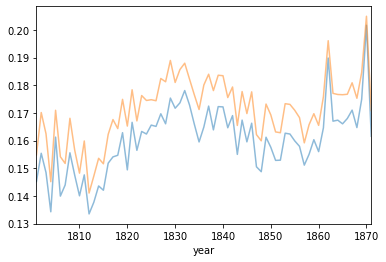

In [31]:
df.groupby('year')['female_1760_1850'].mean().plot(alpha=.5)
df.groupby('year')['child_1760_1850'].mean().plot(alpha=.5)

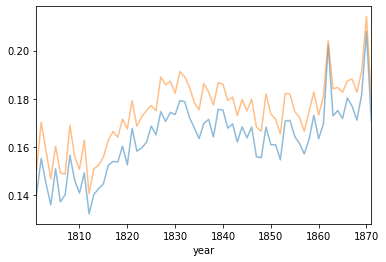

In [33]:
df.groupby('year')['female_1890_1900'].mean().plot(alpha=.5)
df.groupby('year')['child_1890_1900'].mean().plot(alpha=.5)

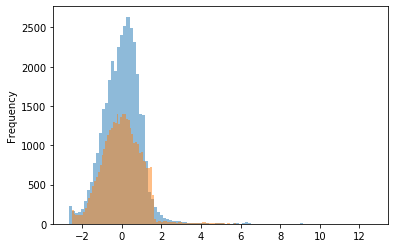

In [51]:
df.child_1760_1850_norm.plot(kind='hist',bins=100,alpha=.5)
df.workforce_1760_1850_norm.plot(kind='hist',bins=100,alpha=.5)

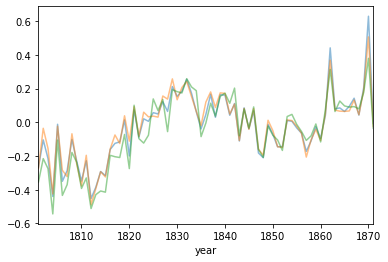

In [48]:
df.groupby('year')['female_1760_1850_norm'].mean().plot(alpha=.5)
df.groupby('year')['child_1760_1850_norm'].mean().plot(alpha=.5)
df.groupby('year')['workforce_1760_1850_norm'].mean().plot(alpha=.5)

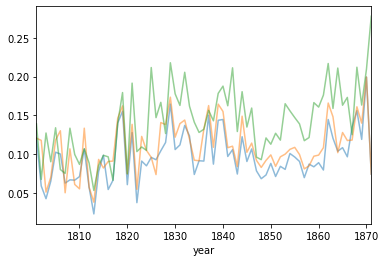

In [76]:
(df[df.female_1760_1850_norm > 1.0].groupby('year')['item_code'].count() / yearly_counts).fillna(0,inplace=False).plot(alpha=.5)
(df[df.child_1760_1850_norm > 1.0].groupby('year')['item_code'].count() / yearly_counts).fillna(0,inplace=False).plot(alpha=.5)
(df[df.workforce_1760_1850_norm > 1.0].groupby('year')['item_code'].count() / yearly_counts).fillna(0,inplace=False).plot(alpha=.5)


In [62]:
df.child_1760_1850_norm.corr(df.female_1760_1850_norm)

0.9618816238916184

In [64]:
df.child_1760_1850.corr(df.workforce_1760_1850)

0.8757183090471947

In [65]:
df.child_1760_1850.corr(df.workanimal_1760_1850)

0.7684939339489624

In [66]:
df.child_1760_1850.corr(df.slave_1760_1850)

0.8419382455034061

In [68]:
df[[i for i in df.columns if i.endswith('1850')]].corr()

,stopwords_1760_1850,punctuation_1760_1850,machines_1760_1850,transport_1760_1850,workforce_1760_1850,energy_1760_1850,upperclass_1760_1850,child_1760_1850,workanimal_1760_1850,spiritual_1760_1850,body_1760_1850,system_1760_1850,nature_1760_1850,slave_1760_1850,female_1760_1850
stopwords_1760_1850,1.000000,0.292690,0.283313,0.413725,0.552420,0.510241,0.757521,0.627640,0.504977,0.641840,0.475153,0.375575,0.566601,0.572427,0.613025
punctuation_1760_1850,0.292690,1.000000,-0.062415,-0.042679,0.011559,-0.056436,0.244617,0.069613,-0.028832,0.013548,-0.058893,-0.080723,-0.026399,-0.053038,0.045959
machines_1760_1850,0.283313,-0.062415,1.000000,0.843240,0.673655,0.845592,0.096246,0.468486,0.775964,0.706886,0.871904,0.795043,0.786481,0.527081,0.464945
transport_1760_1850,0.413725,-0.042679,0.843240,1.000000,0.749251,0.787262,0.322491,0.609250,0.887425,0.701829,0.804635,0.672430,0.815455,0.654321,0.606736
workforce_1760_1850,0.552420,0.011559,0.673655,0.749251,1.000000,0.743433,0.640286,0.875718,0.836218,0.811611,0.763937,0.646867,0.736054,0.882492,0.904750
energy_1760_1850,0.510241,-0.056436,0.845592,0.787262,0.743433,1.000000,0.403271,0.644947,0.789109,0.899793,0.912735,0.839248,0.909126,0.708447,0.616075
upperclass_1760_1850,0.757521,0.244617,0.096246,0.322491,0.640286,0.403271,1.000000,0.757298,0.449432,0.599799,0.361596,0.311595,0.441345,0.673272,0.755692
child_1760_1850,0.627640,0.069613,0.468486,0.609250,0.875718,0.644947,0.757298,1.000000,0.768494,0.777684,0.644705,0.498883,0.710910,0.841938,0.961882
workanimal_1760_1850,0.504977,-0.028832,0.775964,0.887425,0.836218,0.789109,0.449432,0.768494,1.000000,0.786651,0.827479,0.650631,0.840694,0.775060,0.771673
spiritual_1760_1850,0.641840,0.013548,0.706886,0.701829,0.811611,0.899793,0.599799,0.777684,0.786651,1.000000,0.872350,0.807420,0.850929,0.809219,0.752162


In [75]:
for w in ['nature','punctuation','workforce','workanimal','female', 'slave', 'child']:
    print(w,eval(f'df.{w}_1760_1850.corr(df.{w}_1890_1900)'))

nature 0.7971422384815993
punctuation 0.8085199381581224
workforce 0.81583419264114
workanimal 0.8112398736616961
female 0.813852704060492
slave 0.8027885456190769
child 0.7996342968591222


# compare corpus

In [53]:
df_jsa = pd.read_json('jsa_clusters.json')
df_jsa['timestamp'] = df_jsa.issue_date.apply(to_timestap)
df_jsa['year'] = df_jsa.timestamp.apply(lambda x: x.year)

In [56]:
df_jsa.head()

,filename,journal_id,journal_title,publisher_name,volume,issue_id,article_type,title_group,date,year,...,workanimal_1890_1900,spiritual_1890_1900,body_1890_1900,system_1890_1900,nature_1890_1900,slave_1890_1900,female_1890_1900,female_1760_1850_norm,child_1760_1850_norm,workforce_1760_1850_norm
0,journal-article-10.2307_41325409,j50003411,"Transactions of the Society, Instituted at Lon...",The Society,23,i40060561,research-article,PAPERS IN MANUFACTURES,1805-01-01,1805,...,0.355,0.322,0.453,0.377,0.366,0.179,0.201,0.926846,0.983961,1.334947
1,journal-article-10.2307_41325409,j50003411,"Transactions of the Society, Instituted at Lon...",The Society,23,i40060561,research-article,PAPERS IN MANUFACTURES,1805-01-01,1805,...,0.089,0.111,0.112,0.109,0.099,0.067,0.082,-1.816090,-1.683590,-1.698277
2,journal-article-10.2307_41325409,j50003411,"Transactions of the Society, Instituted at Lon...",The Society,23,i40060561,research-article,PAPERS IN MANUFACTURES,1805-01-01,1805,...,0.132,0.142,0.130,0.117,0.119,0.118,0.136,-0.752503,-0.843129,-1.041600
3,journal-article-10.2307_41325409,j50003411,"Transactions of the Society, Instituted at Lon...",The Society,23,i40060561,research-article,PAPERS IN MANUFACTURES,1805-01-01,1805,...,0.407,0.365,0.516,0.424,0.415,0.204,0.231,1.188078,1.148400,1.189018
4,journal-article-10.2307_41325409,j50003411,"Transactions of the Society, Instituted at Lon...",The Society,23,i40060561,research-article,PAPERS IN MANUFACTURES,1805-01-01,1805,...,0.401,0.359,0.469,0.407,0.358,0.155,0.213,1.038802,0.837794,1.647650


In [54]:
df_jsa['female_1760_1850_norm'] = (df_jsa.female_1760_1850  - df_jsa.female_1760_1850.mean()) / df_jsa.female_1760_1850.std()
df_jsa['child_1760_1850_norm'] = (df_jsa.child_1760_1850  - df_jsa.child_1760_1850.mean()) / df_jsa.child_1760_1850.std()
df_jsa['workforce_1760_1850_norm'] = (df_jsa.workforce_1760_1850  - df_jsa.workforce_1760_1850.mean()) / df_jsa.workforce_1760_1850.std()

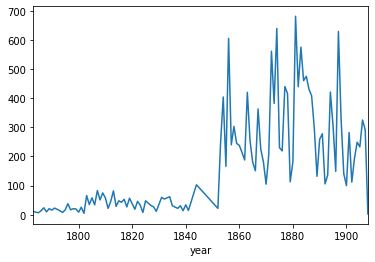

In [57]:
yearly_counts_jsa = df_jsa.groupby('year')['filename'].count()
yearly_counts_jsa.plot()

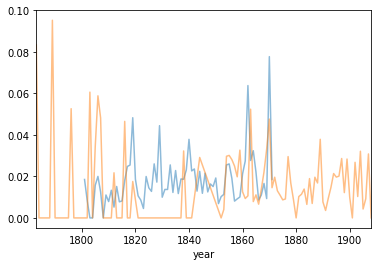

In [58]:
(df[df.female_1760_1850_norm > 2.0].groupby('year')['item_code'].count() / yearly_counts).fillna(0,inplace=False).plot(alpha=.5)
(df_jsa[df_jsa.female_1760_1850_norm > 2.0].groupby('year')['filename'].count() / yearly_counts_jsa).fillna(0,inplace=False).plot(alpha=.5)


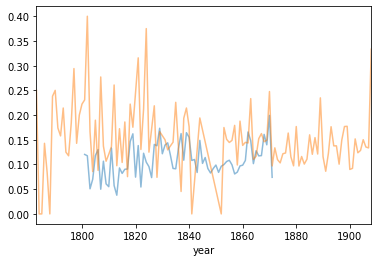

In [60]:
(df[df.child_1760_1850_norm > 1.0].groupby('year')['item_code'].count() / yearly_counts).fillna(0,inplace=False).plot(alpha=.5)
(df_jsa[df_jsa.child_1760_1850_norm > 1.0].groupby('year')['filename'].count() / yearly_counts_jsa).fillna(0,inplace=False).plot(alpha=.5)


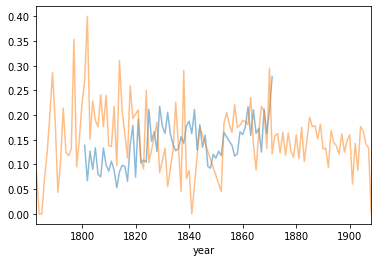

In [61]:
(df[df.workforce_1760_1850_norm > 1.0].groupby('year')['item_code'].count() / yearly_counts).fillna(0,inplace=False).plot(alpha=.5)
(df_jsa[df_jsa.workforce_1760_1850_norm > 1.0].groupby('year')['filename'].count() / yearly_counts_jsa).fillna(0,inplace=False).plot(alpha=.5)


In [69]:
df_jsa[[i for i in df_jsa.columns if i.endswith('1850')]].corr()

,stopwords_1760_1850,punctuation_1760_1850,machines_1760_1850,transport_1760_1850,workforce_1760_1850,energy_1760_1850,upperclass_1760_1850,child_1760_1850,workanimal_1760_1850,spiritual_1760_1850,body_1760_1850,system_1760_1850,nature_1760_1850,slave_1760_1850,female_1760_1850
stopwords_1760_1850,1.000000,0.266467,0.252673,0.414530,0.563471,0.483207,0.786831,0.676592,0.498700,0.644198,0.451265,0.356653,0.552545,0.609244,0.662829
punctuation_1760_1850,0.266467,1.000000,-0.065473,-0.028648,0.022478,-0.061671,0.288933,0.085380,-0.021963,0.003055,-0.082748,-0.092647,-0.029954,-0.050067,0.043256
machines_1760_1850,0.252673,-0.065473,1.000000,0.896447,0.698551,0.792605,0.053290,0.490283,0.801622,0.676891,0.878308,0.769318,0.764183,0.523101,0.509241
transport_1760_1850,0.414530,-0.028648,0.896447,1.000000,0.792518,0.775427,0.268239,0.624539,0.908642,0.722163,0.857798,0.713244,0.806143,0.657491,0.654315
workforce_1760_1850,0.563471,0.022478,0.698551,0.792518,1.000000,0.715582,0.595394,0.858936,0.833161,0.807027,0.785763,0.655464,0.724874,0.863388,0.905538
energy_1760_1850,0.483207,-0.061671,0.792605,0.775427,0.715582,1.000000,0.351791,0.650987,0.759871,0.869793,0.874046,0.771251,0.885083,0.697026,0.631783
upperclass_1760_1850,0.786831,0.288933,0.053290,0.268239,0.595394,0.351791,1.000000,0.742211,0.387382,0.585193,0.311214,0.281211,0.392346,0.648168,0.732381
child_1760_1850,0.676592,0.085380,0.490283,0.624539,0.858936,0.650987,0.742211,1.000000,0.761790,0.808461,0.681289,0.517403,0.729436,0.871120,0.954552
workanimal_1760_1850,0.498700,-0.021963,0.801622,0.908642,0.833161,0.759871,0.387382,0.761790,1.000000,0.774905,0.850316,0.665171,0.826259,0.761033,0.784835
spiritual_1760_1850,0.644198,0.003055,0.676891,0.722163,0.807027,0.869793,0.585193,0.808461,0.774905,1.000000,0.855736,0.784054,0.830643,0.810657,0.789400
